In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import pprint as pp
from math import sin, cos, sqrt, atan2, radians


In [2]:

def print_clusters(clusters, df):
    cluster_num = 0
    for cluster in clusters:
        for address_id in cluster:
            df.loc[df['id'] == address_id, 'cluster_num'] = cluster_num
        cluster_num += 1


    plt.rcParams["figure.figsize"]=15,15
    df.plot.scatter(x = 'latitude', y = 'longitude', c='cluster_num', s=15, cmap='tab20')

In [3]:
def match_clusters(clusters, address_ids):
    for address_id in address_ids[:]:
        current_address = df[df.id==address_id]
    
        min_distance = math.inf
        potential_cluster = None
    
        for cluster in clusters:
            if len(cluster) < MAX_ADDRESS_PER_ROUTE:
                for temp_address_id in cluster:
#                     print("cmp -> "+ str(temp_address_id) + " " + str(address_id))
                    distance = get_distance(temp_address_id, address_id)
                    if distance < min_distance:
#                         print(distance)
                        min_distance = distance
                        potential_cluster = cluster
    #     print(min_distance)
#         if min_distance > 1:
#             print(min_distance)
        potential_cluster.append(address_id)
    return clusters

# for g in clusters:
#     print(g)
    
# print_clusters(clusters, df)

In [4]:
def get_distance(addr_id_1, addr_id_2):
    addr1 = df[df.id==addr_id_1]
    addr2 = df[df.id==addr_id_2]
    return _get_distance(addr1['latitude'], addr1['longitude'], addr2['latitude'], addr2['longitude'])
    
def _get_distance(lon1, lat1, lon2, lat2):
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [5]:
ADDRESSES_PER_ROUTE = 12
MAX_ADDRESS_PER_ROUTE = 12

df = pd.read_csv('cordsAll.csv')
# df = pd.read_csv('cords.csv')
df['visited'] = False
df.head(3)

number_of_routes = math.ceil(df['id'].count()/ADDRESSES_PER_ROUTE)
initial_groups = df['id'].sample(n=number_of_routes)
# df.loc[df.id.isin(initial_groups.values)] = 1

# this can be done without a loop
for i in range(len(initial_groups.values)):
    df.loc[df['id'] == initial_groups.values[i], 'visited'] = True

groups = [ [group] for group in initial_groups.array ]

# pd.set_option('display.max_rows', df.shape[0]+1)

print(groups)

clusters = [ [group] for group in initial_groups.array ]

not_yet_visited = df[df.visited == False]['id']
clusters = match_clusters(clusters, not_yet_visited)


# df

[[376], [108], [249], [78], [71], [541], [343], [292], [323], [426], [563], [468], [34], [132], [1], [196], [558], [302], [548], [487], [121], [300], [156], [22], [29], [429], [357], [41], [72], [127], [313], [348], [345], [565], [112], [500], [421], [524], [40], [176], [432]]


In [6]:
def find_nearset_neighbors_in_cluster(cluster):
    nearest_neighbors = []
    for address1 in cluster:
        min_distance = math.inf
        closest_neighbor = None

        for address2 in cluster:
            if address1 == address2:
                continue
            distance = get_distance(address1, address2)
            if min_distance > distance:
                min_distance = distance
                closest_neighbor = address2
        nearest_neighbors.append({"neighbor1": address1,
                                  "neighbor2": closest_neighbor, 
                                  "distance": min_distance})
    

#     pp.pprint(nearest_neighbors)
    return nearest_neighbors
        

[479, 511, 221, 309, 371, 305, 74, 38, 480, 60, 308, 501, 252, 98, 1, 180, 370, 412, 339, 165, 476, 519, 517, 301, 283, 463, 422, 485, 438, 547, 469, 69, 373, 507, 414, 290, 253, 418, 504, 91, 456, 104, 510, 216, 316, 346, 299, 14, 51, 466, 37, 563, 502, 326, 68, 562, 175, 208, 409, 321, 188, 472, 521, 518, 70, 295, 433, 437, 482, 72, 551, 44, 113, 345, 341, 203, 276, 254, 425, 506, 186, 465, 9, 515, 236, 80, 53, 306, 45, 6, 323, 217, 310, 499, 329, 160, 564, 153, 324, 141, 328, 189, 474, 300, 174, 265, 20, 462, 443, 446, 199, 127, 185, 101, 340, 197, 416, 193, 262, 427, 508, 200, 226, 481, 512, 233, 359, 220, 284, 246, 63, 557, 21, 529, 460, 317, 137, 7, 179, 135, 122, 344, 171, 449, 353, 404, 269, 271, 450, 444, 470, 210, 533, 313, 120, 365, 565, 149, 126, 267, 428, 509, 304, 286, 82, 514, 46, 261, 350, 273, 66, 39, 554, 15, 523, 471, 362, 131, 553, 89, 105, 302, 349, 190, 436, 505, 461, 22, 256, 447, 357, 458, 133, 546, 405, 134, 372, 204, 128, 84, 27, 403, 218, 201, 307]
about to m

[479, 98, 216, 300, 286, 505, 70, 51, 82, 281, 370, 483, 20, 68, 343, 404, 90, 107, 60, 277, 307, 39, 553, 62, 463, 353, 45, 129, 135, 299, 469, 147, 340, 7, 425, 195, 271, 418, 523, 413, 456, 104, 496, 549, 309, 521, 346, 433, 522, 310, 373, 328, 18, 359, 160, 544, 137, 159, 141, 542, 171, 499, 6, 180, 357, 330, 507, 14, 84, 133, 280, 44, 127, 4, 308, 445, 502, 13, 349, 473, 407, 226, 9, 212, 371, 261, 550, 367, 38, 485, 528, 437, 301, 83, 235, 25, 545, 89, 57, 122, 453, 190, 79, 238, 131, 214, 29, 254, 434, 509, 438, 221, 185, 165, 239, 563, 203, 276, 421, 283, 218, 460, 480, 481, 204, 263, 225, 329, 220, 198, 253, 202, 426, 290, 513, 317, 551, 30, 153, 105, 302, 73, 166, 442, 564, 175, 74, 278, 524, 454, 304, 555, 476, 313, 88, 8, 341, 149, 208, 552, 548, 101, 87, 11, 377, 529, 35, 184, 53, 562, 168, 285, 323, 295, 423, 86, 49, 108, 19, 561, 355, 170, 267, 154, 436, 422, 136, 219, 293, 429, 37, 200, 110, 233, 405, 152, 250, 197, 532, 324, 360, 249, 211, 76, 525]
about to match clust

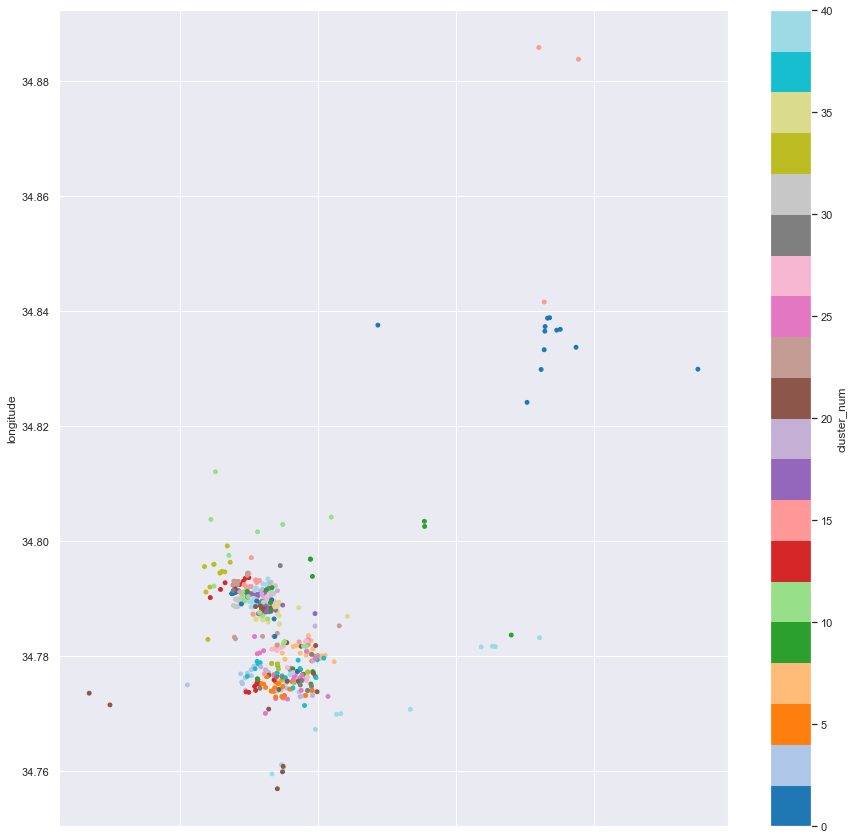

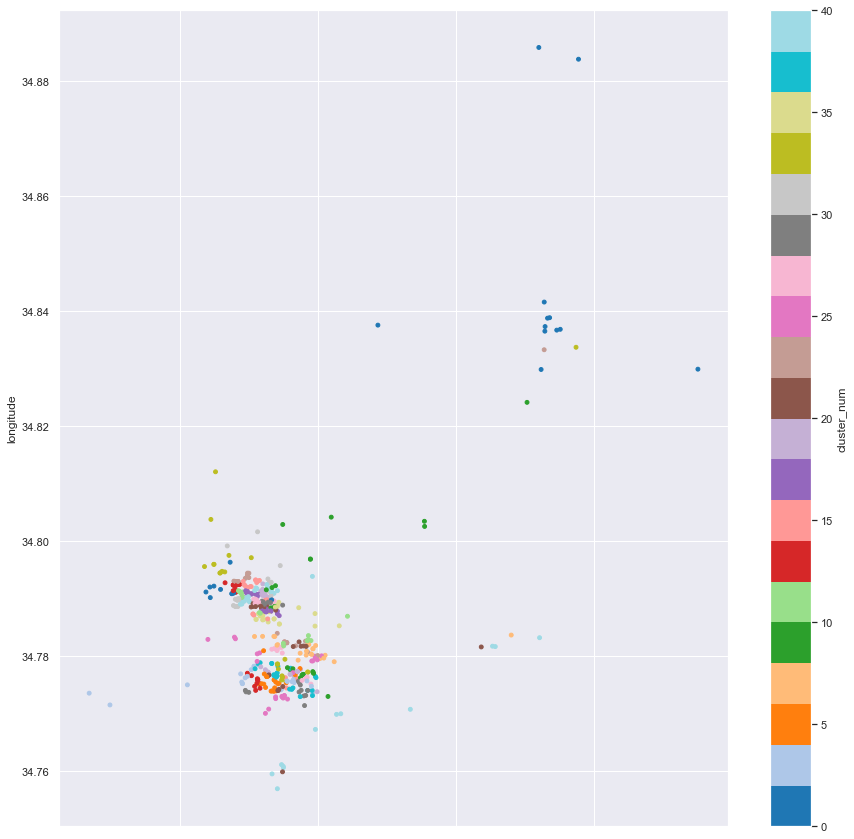

In [7]:
print_clusters(clusters, df)
for i in range(10):

    pending_allocation = []
    for j in range(5):
        for cluster in clusters:
            nearest_neighbors = find_nearset_neighbors_in_cluster(cluster)
            farthest_neighbor = max(nearest_neighbors, key=lambda neighbor: neighbor['distance'])['neighbor1']
            pending_allocation.append(farthest_neighbor)
            cluster.remove(farthest_neighbor)

#         for k, address_id in enumerate(allocation):
#             clusters[k].remove(address_id)
    
    print(pending_allocation)
    print("about to match clusters")
    clusters = match_clusters(clusters, pending_allocation)

print_clusters(clusters, df)

In [8]:
clusters

[[376, 2, 5, 374, 402, 535, 1, 479, 82, 553, 7, 104],
 [139, 140, 210, 169, 516, 458, 98, 68, 496, 204, 529, 197],
 [32, 229, 237, 242, 306, 474, 428, 373, 545, 453, 434, 221],
 [78, 248, 270, 352, 356, 80, 427, 300, 353, 309, 359, 261],
 [71, 55, 59, 163, 288, 462, 350, 220, 53, 49, 429, 37],
 [541, 255, 260, 264, 274, 252, 345, 13, 35, 562, 267, 293],
 [67, 103, 517, 547, 22, 510, 448, 70, 433, 38, 214, 254],
 [36, 48, 61, 64, 66, 63, 269, 51, 39, 522, 480, 253],
 [451, 534, 556, 559, 69, 482, 449, 147, 195, 310, 9, 528],
 [16, 26, 47, 65, 231, 519, 262, 271, 437, 283, 426, 454],
 [530, 539, 321, 518, 265, 447, 292, 62, 6, 445, 485, 290],
 [138, 158, 566, 468, 18, 83, 513, 86],
 [34, 33, 257, 361, 466, 546, 232, 550, 225, 329, 317, 184],
 [132, 56, 114, 172, 174, 93, 194, 404, 160, 25, 551, 108],
 [560, 134, 128, 120, 191, 470, 199, 233, 250, 532, 360, 249],
 [196, 85, 118, 173, 192, 130, 179, 107, 137, 89, 153, 561],
 [558, 58, 181, 182, 410, 554, 424, 90, 159, 57, 105, 442],
 [77, 

In [9]:
df

,id,latitude,longitude,visited,cluster_num
0,1,32.092801,34.841551,True,0.0
1,3,32.051162,34.780437,False,25.0
2,2,32.095127,34.836818,False,0.0
3,5,32.093583,34.838832,False,0.0
4,6,32.058585,34.783606,False,10.0
...,...,...,...,...,...
483,562,32.052182,34.776943,False,5.0
484,563,32.044437,34.803792,True,33.0
485,564,32.057230,34.782516,False,21.0
486,565,32.043509,34.795602,True,33.0


In [10]:
df.to_csv('results.csv', index=False, float_format="%d", columns=['id', 'cluster_num'])